In [308]:
# création d'un dataset avec chaque année et chaque variable économique
import import_ipynb
import utils
import numpy as np
# pour 1 evenement 
""" 
data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")
#data_life = utils.generate_df_from_files("./data_cleaned/life_expectancy_by_years", "_life_expectancy")
# 11 = dataset de 1992 12 = dataset de 1996 ...
annee = 15
data_pop = data_pop[annee:]
data_fertility = data_fertility[annee:]
data_child = data_child[annee:]
data_capita = data_capita[annee:]

X = np.concatenate((
    data_pop[0].iloc[:, 1:], 
    data_fertility[0].iloc[:,1:], 
    data_child[0].iloc[:,1:], 
    data_capita[0].iloc[:,1:] 
), axis=1)


"""

' \ndata_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")\ndata_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")\ndata_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")\ndata_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")\n#data_life = utils.generate_df_from_files("./data_cleaned/life_expectancy_by_years", "_life_expectancy")\n# 11 = dataset de 1992 12 = dataset de 1996 ...\nannee = 15\ndata_pop = data_pop[annee:]\ndata_fertility = data_fertility[annee:]\ndata_child = data_child[annee:]\ndata_capita = data_capita[annee:]\n\nX = np.concatenate((\n    data_pop[0].iloc[:, 1:], \n    data_fertility[0].iloc[:,1:], \n    data_child[0].iloc[:,1:], \n    data_capita[0].iloc[:,1:] \n), axis=1)\n\n\n'

In [309]:
# methode pour les 8 evenements de la seconde partie
data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")

X_list = []

for annee in range(11, 19):
    data_pop_slice = data_pop[annee].iloc[:, 1:]
    data_fertility_slice = data_fertility[annee].iloc[:, 1:]
    data_child_slice = data_child[annee].iloc[:, 1:]
    data_capita_slice = data_capita[annee].iloc[:, 1:]

    concatenated_data = np.concatenate((
        data_pop_slice, 
        data_fertility_slice, 
        data_child_slice, 
        data_capita_slice
    ), axis=1)

    X_list.append(concatenated_data)

X = np.vstack(X_list)

In [310]:
# création des label pour tous les événements 1992->2020
import pandas as pd
df_delegations = pd.read_csv("./second_part_countries_cleaned_normalized.csv")

labels_list = []
for i in range(len(df_delegations)):
    label = df_delegations.iloc[i, :-1]
    labels_list.append(label)

y = pd.concat(labels_list, axis=0, ignore_index=True)


In [311]:
y.shape

(1304,)

In [312]:
X.shape

(1304, 4)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)


c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2897 - mae: 0.3991 - val_loss: 0.2514 - val_mae: 0.4017
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2030 - mae: 0.3608 - val_loss: 0.1922 - val_mae: 0.3759
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1743 - mae: 0.3530 - val_loss: 0.1720 - val_mae: 0.3661
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1656 - mae: 0.3498 - val_loss: 0.1658 - val_mae: 0.3597
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1594 - mae: 0.3436 - val_loss: 0.1626 - val_mae: 0.3571
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1471 - mae: 0.3299 - val_loss: 0.1617 - val_mae: 0.3545
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1492 - mae: 0.3341 - val_loss: 0.1588 - val_mae: 0.3521
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1383 - mae: 0.3210 - val_loss: 0.1580 - val_mae: 0.3515
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1568 - mae

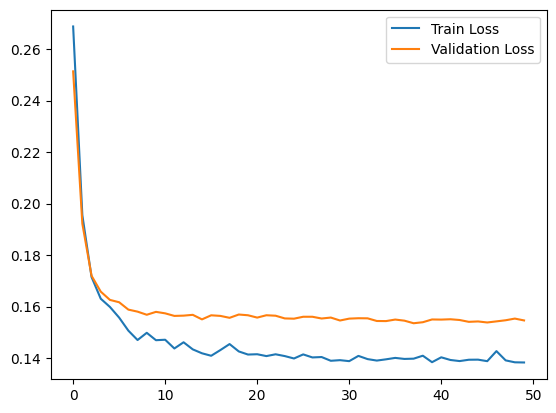

In [314]:
# plot de history pour voir l'évolution de la loss et de la mae
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [315]:
predictions = model.predict(X_test)
#evaluation du mlp
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_squared_error(y_test, predictions)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


0.14231975379071587

In [316]:

res = []
for i in range(len(predictions)):
    res.append({
        "prediction": predictions[i][0],
        "real": y_test[i]
    })
    
pd.DataFrame(data=res).to_csv("predictions_mpl.csv")

KeyError: 0